In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spectral_analysis as sa
from math import floor
import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Shears

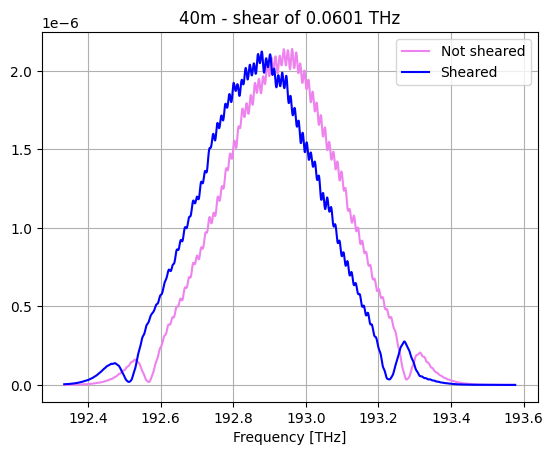

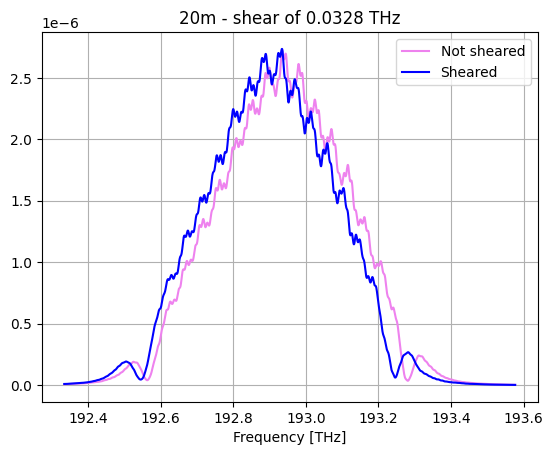

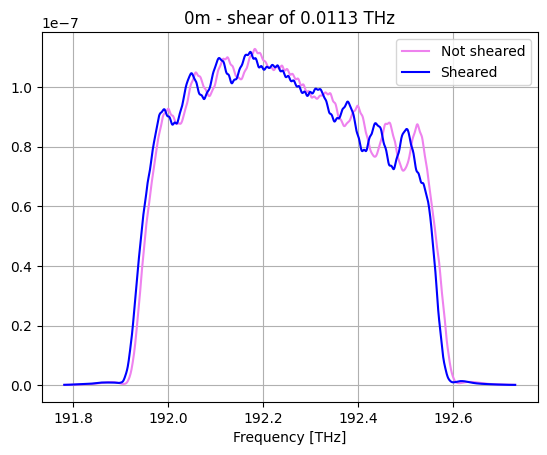

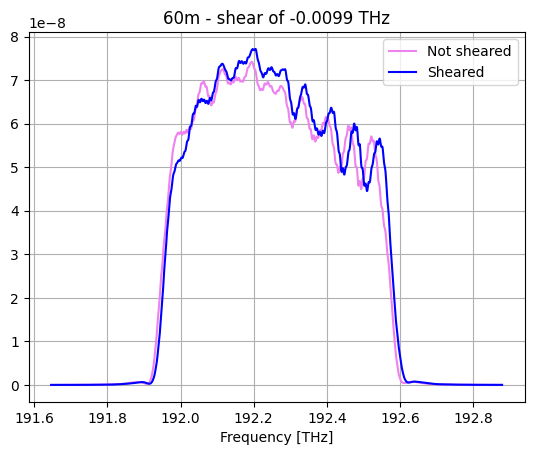

In [154]:
not_sheared40 = sa.load_csv("data/40m_not_sheared.csv")
sheared40 = sa.load_csv("data/40m_sheared.csv")
not_sheared20 = sa.load_csv("data/20m_not_sheared.csv")
sheared20 = sa.load_csv("data/20m_sheared.csv")
not_sheared60 = sa.load_csv("data/60m_not_sheared.csv")
sheared60 = sa.load_csv("data/60m_sheared.csv")
not_sheared0 = sa.load_csv("data/0m_not_sheared.csv")
sheared0 = sa.load_csv("data/0m_sheared.csv")

not_sheared40.wl_to_freq()
sheared40.wl_to_freq()
not_sheared20.wl_to_freq()
sheared20.wl_to_freq()
not_sheared60.wl_to_freq()
sheared60.wl_to_freq()
not_sheared0.wl_to_freq()
sheared0.wl_to_freq()

not_sheared40.moving_average(0.02)
sheared40.moving_average(0.02)
not_sheared20.moving_average(0.02)
sheared20.moving_average(0.02)
not_sheared0.moving_average(0.02)
sheared0.moving_average(0.02)
not_sheared60.moving_average(0.02)
sheared60.moving_average(0.02)

shear40 = sa.find_shift(not_sheared40, sheared40)
shear20 = sa.find_shift(not_sheared20, sheared20)
shear0 = sa.find_shift(not_sheared0, sheared0)
shear60 = sa.find_shift(not_sheared60, sheared60)

sa.compare_plots([not_sheared40, sheared40], 
            legend = ["Not sheared", "Sheared"],
            title = "40m - shear of {} THz".format(round(shear40, 4)))

sa.compare_plots([not_sheared20, sheared20], 
            legend = ["Not sheared", "Sheared"],
            title = "20m - shear of {} THz".format(round(shear20, 4)))

sa.compare_plots([not_sheared0, sheared0], 
            legend = ["Not sheared", "Sheared"],
            title = "0m - shear of {} THz".format(round(shear0, 4)))

sa.compare_plots([not_sheared60, sheared60], 
            legend = ["Not sheared", "Sheared"],
            title = "60m - shear of {} THz".format(round(shear60, 4)))

# 0+80 m

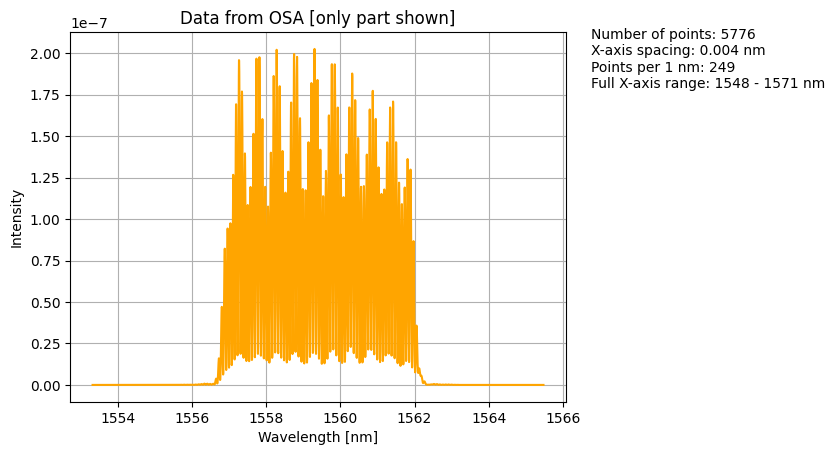

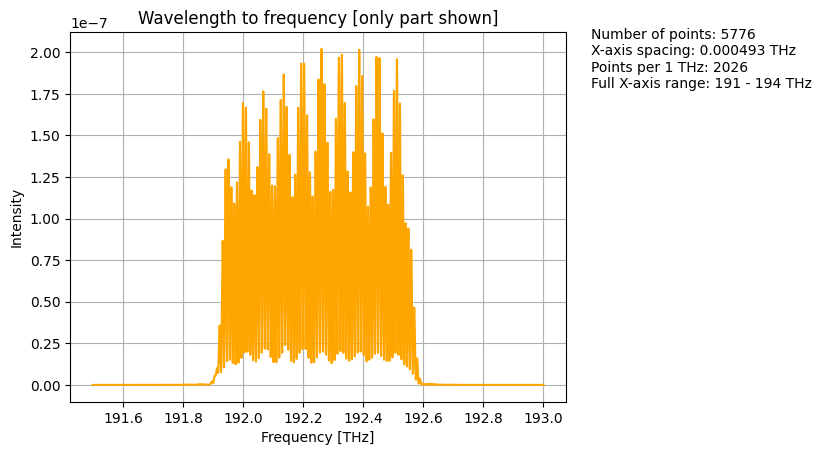

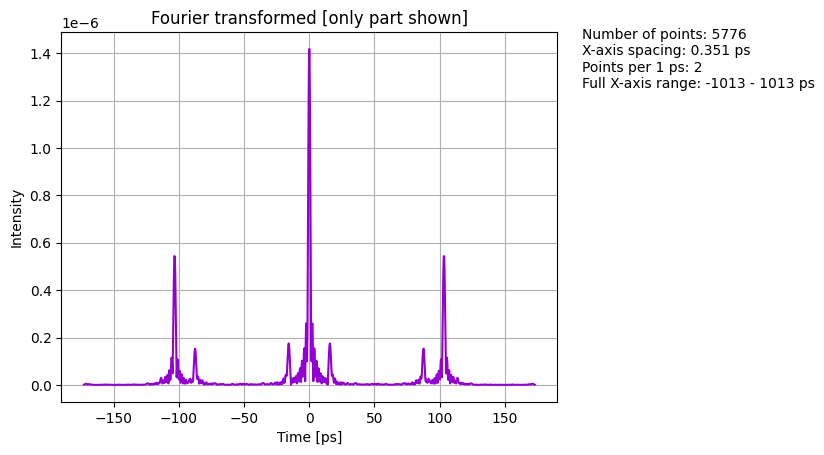

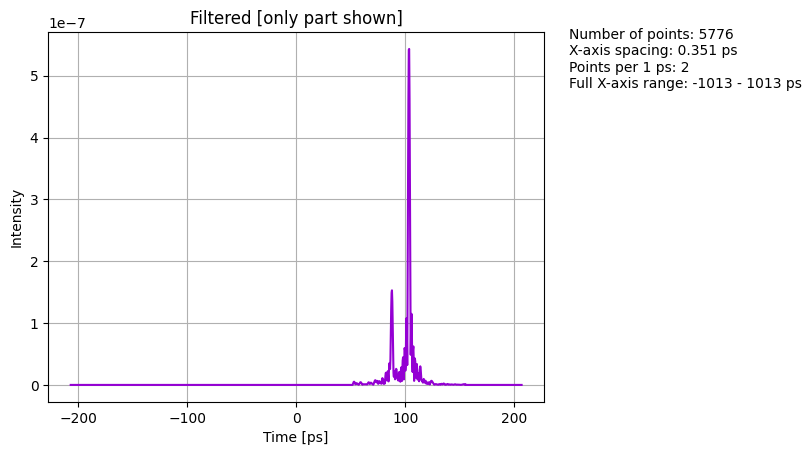

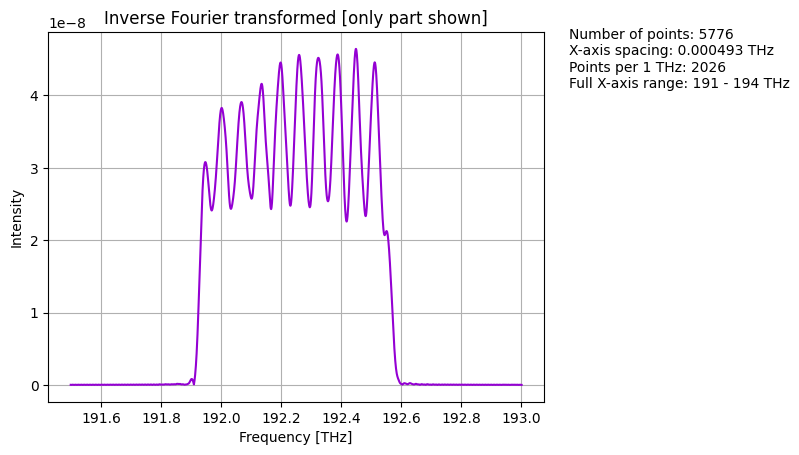

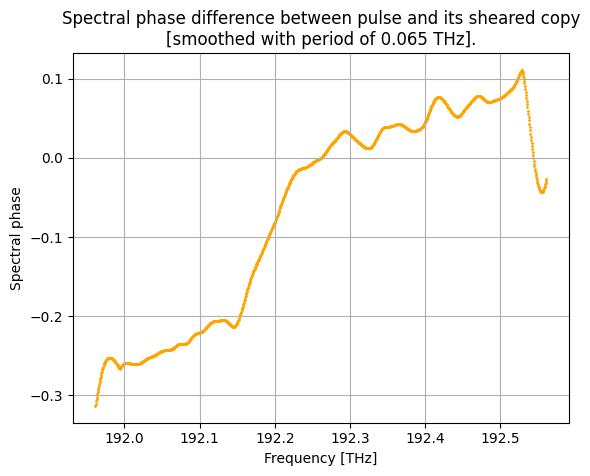

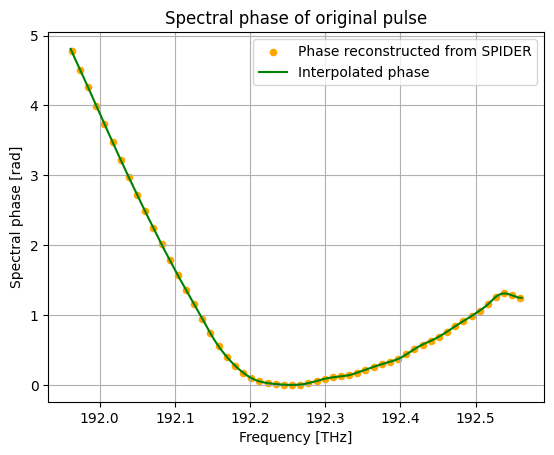

In [155]:
start = 191.95
end = 192.55
pulse20 = sa.spider(phase_spectrum = "data/0m_p_spectrum.csv",
        temporal_spectrum = "data/0m_t_spectrum.csv",
        shear = shear0,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        smoothing_period = 0.065,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

# 20+80 m

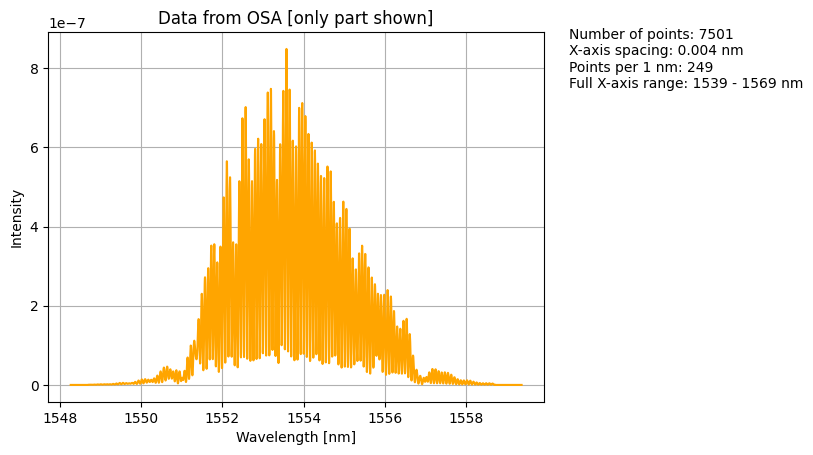

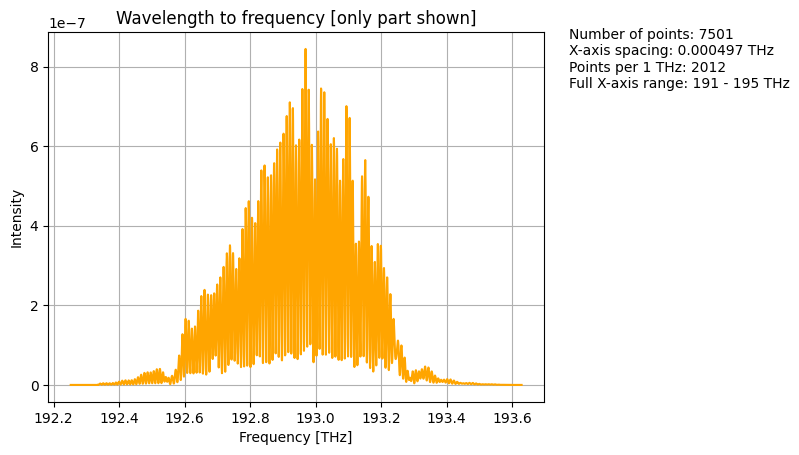

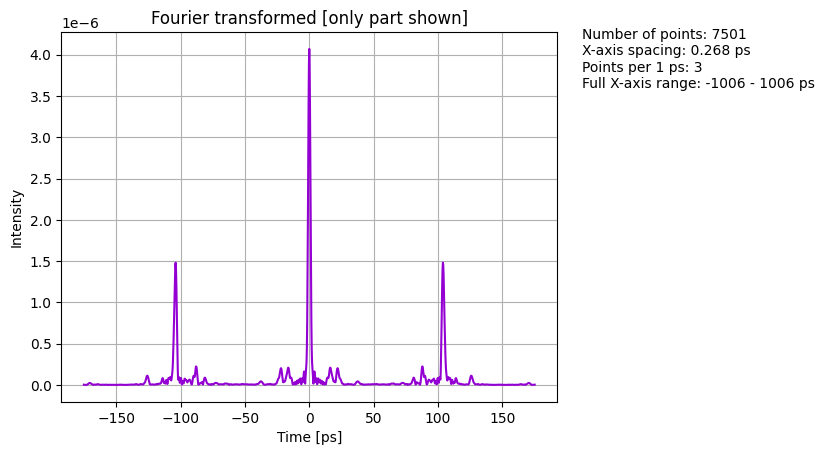

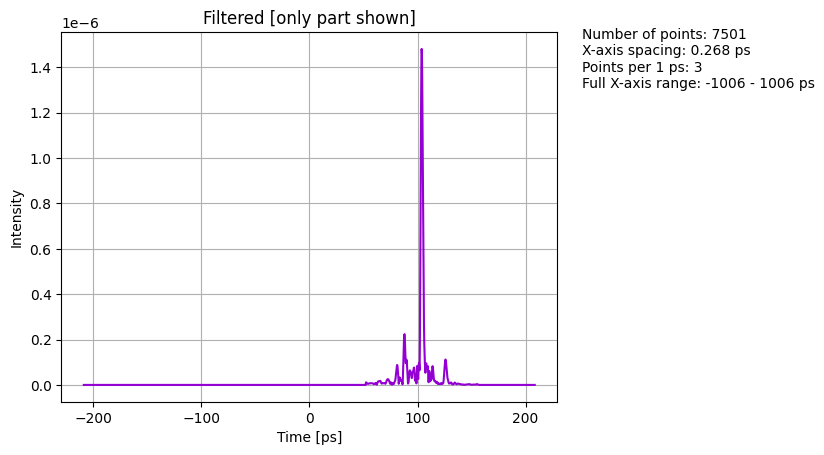

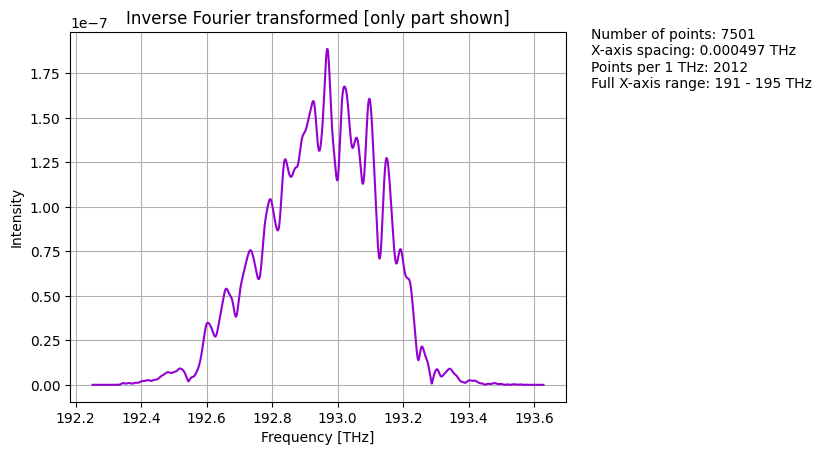

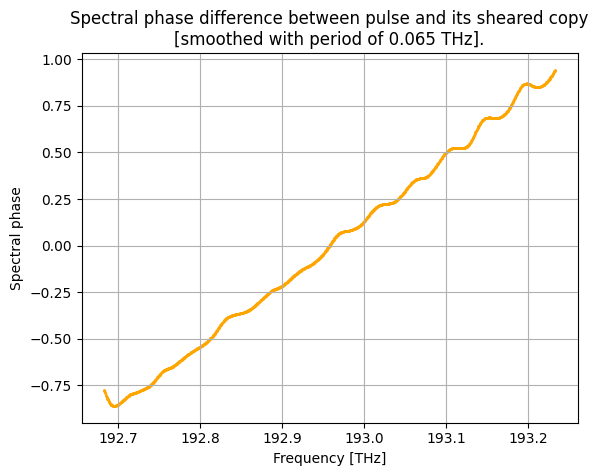

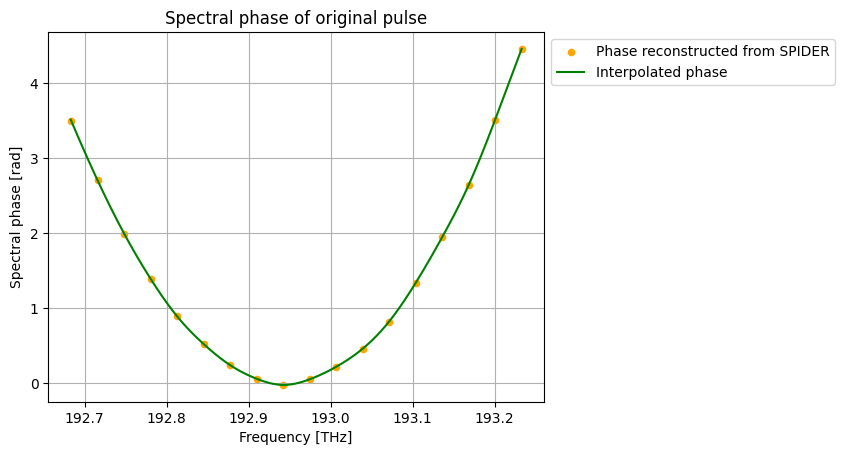

In [156]:
start = 192.65
end = 193.2
pulse20 = sa.spider(phase_spectrum = "data/20m_p_spectrum.csv",
        temporal_spectrum = "data/20m_t_spectrum.csv",
        shear = shear20,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        smoothing_period = 0.065,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

# 40+80 m

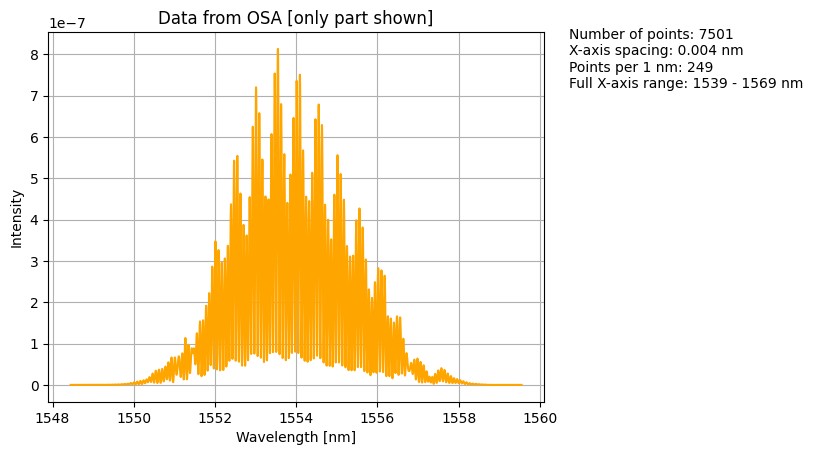

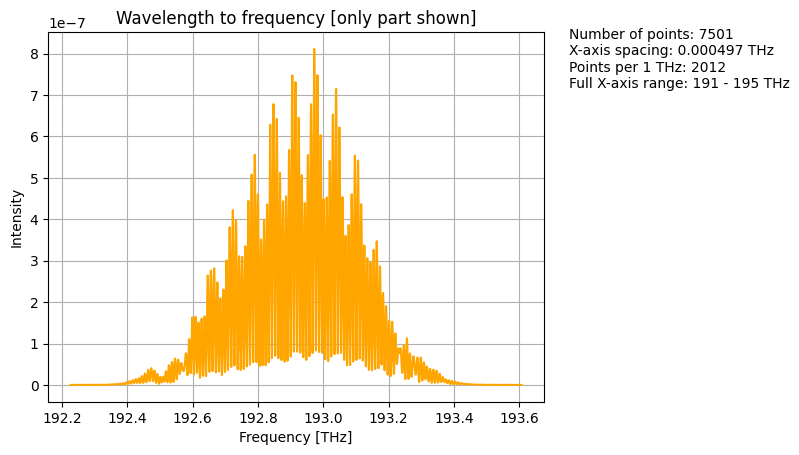

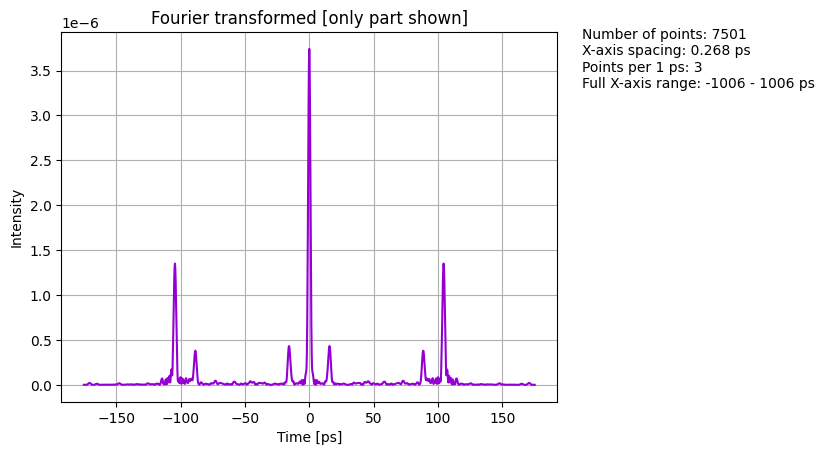

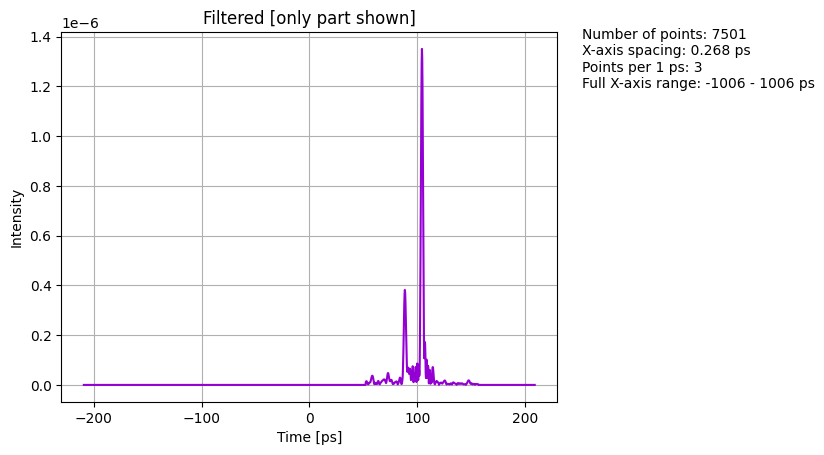

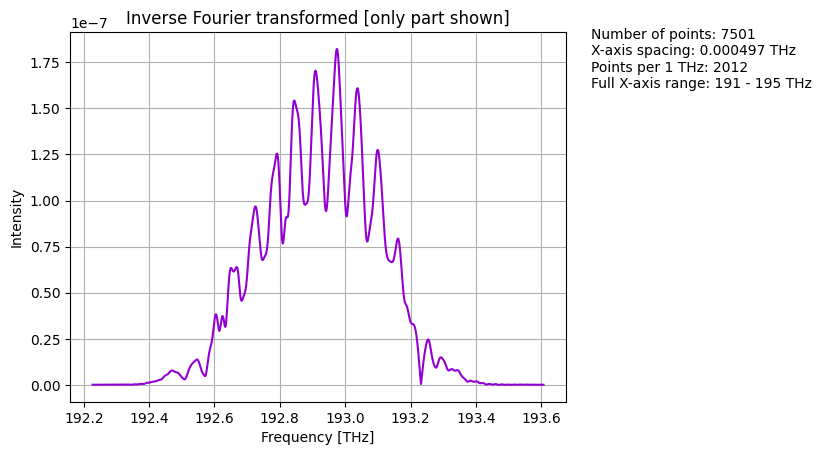

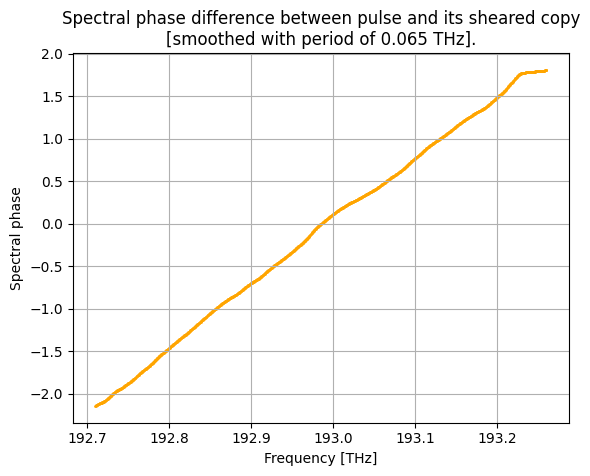

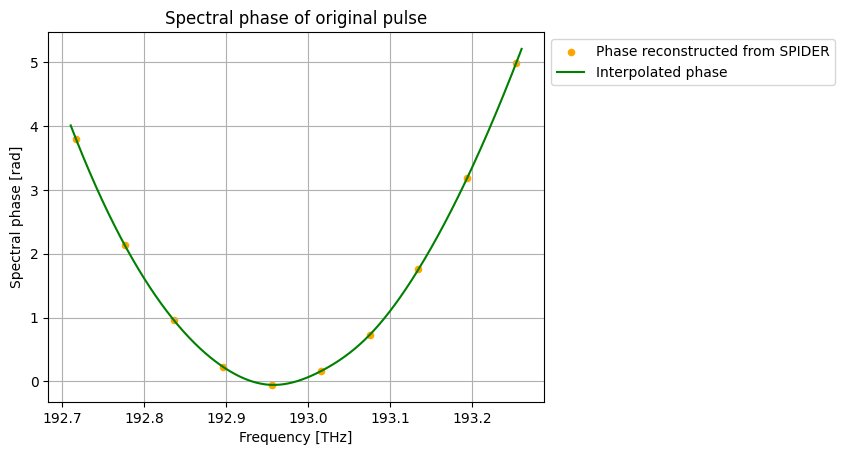

In [157]:
start = 192.65
end = 193.2
pulse40 = sa.spider(phase_spectrum = "data/40m_p_spectrum.csv",
        temporal_spectrum = "data/40m_t_spectrum.csv",
        shear = shear40,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        smoothing_period = 0.065,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

# 80+60 m

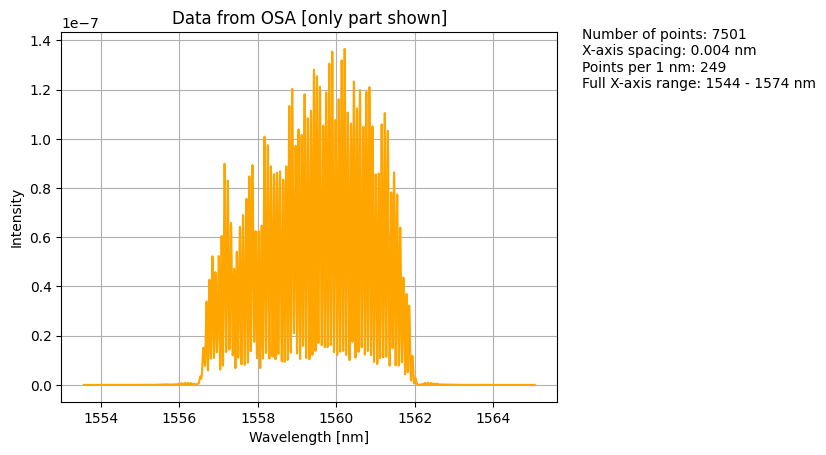

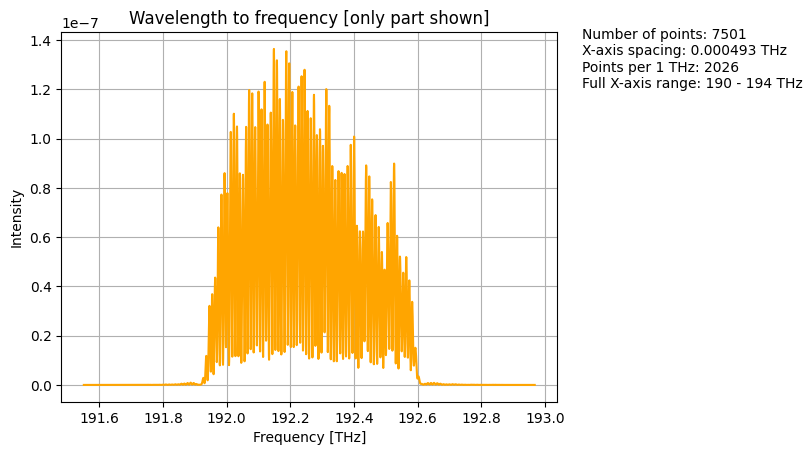

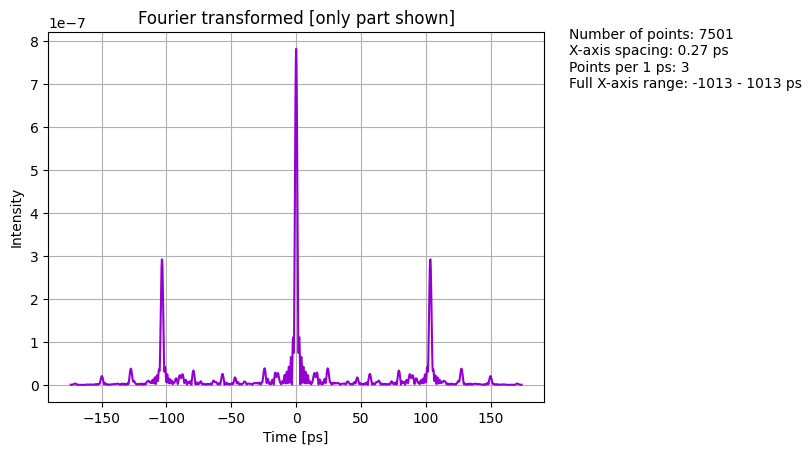

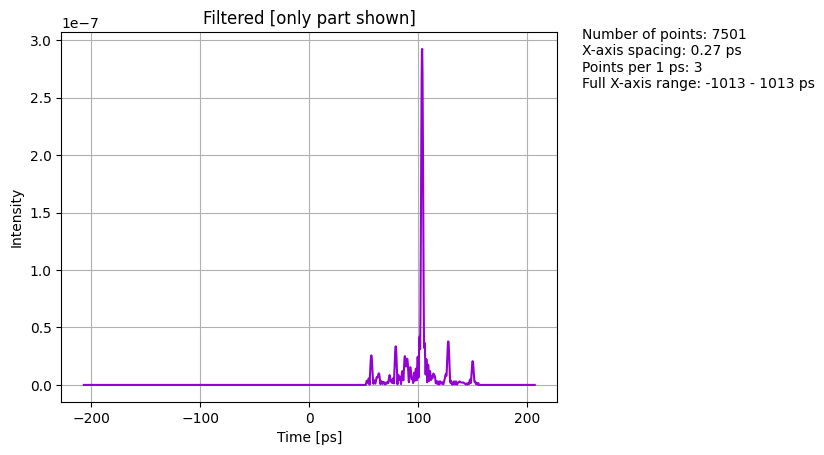

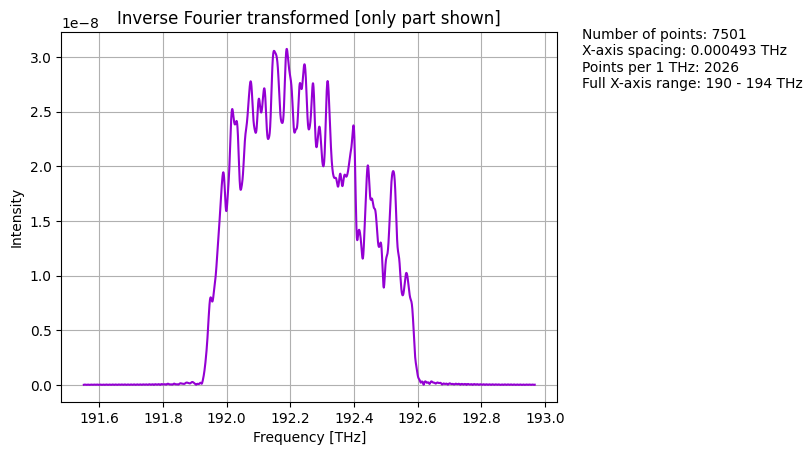

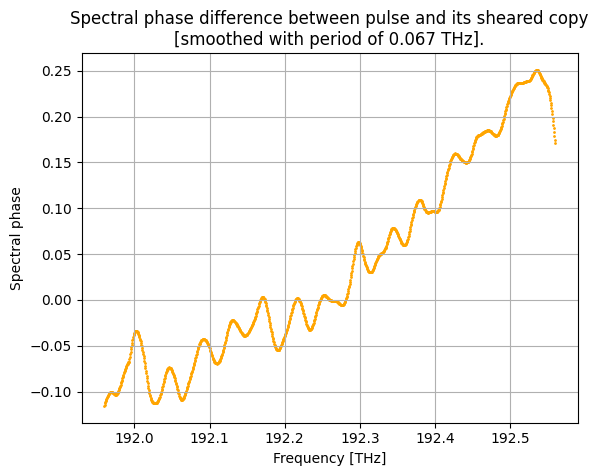

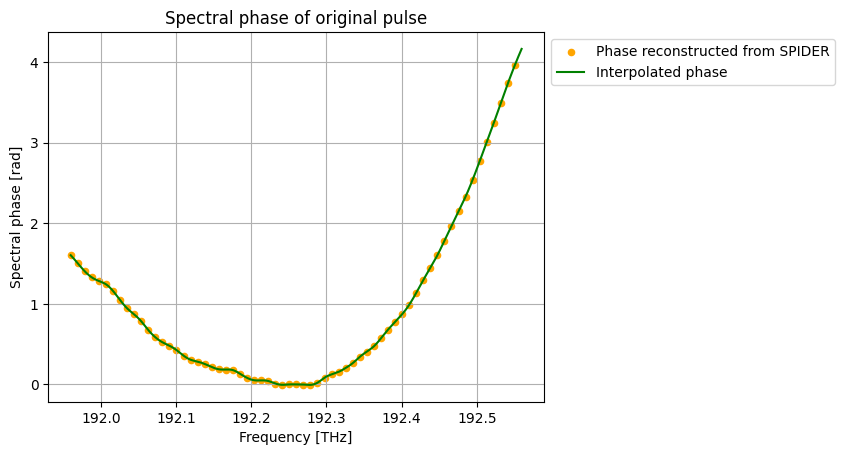

In [158]:
start = 191.95
end = 192.55
pulse20 = sa.spider(phase_spectrum = "data/60m_p_spectrum.csv",
        temporal_spectrum = "data/60m_t_spectrum.csv",
        shear = np.abs(shear60),
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        smoothing_period = 0.067,
        plot_steps = True,
        plot_shear = True,
        plot_phase = True,
        plot_pulse = False)[1]

# 80m

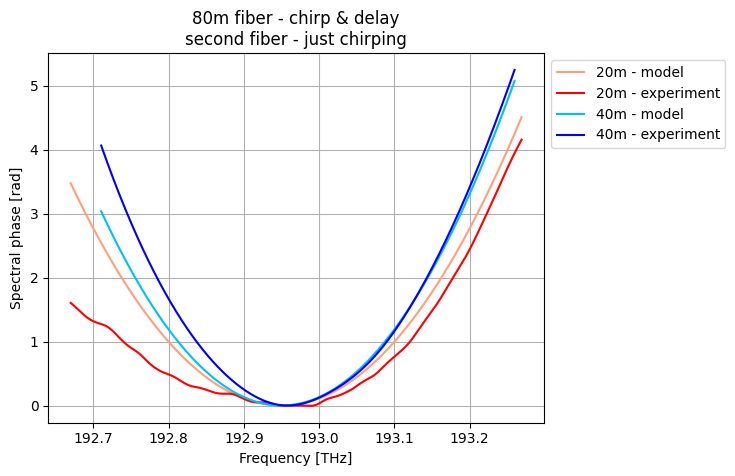

In [159]:
def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

pulse20.shift(0.71)
X1 = pulse20.X.copy()
Y20 = phase(X1, 192.95, 80+20+3)
pulse_sim20 = sa.spectrum(X1, Y20, "freq", "phase")

pulse40.Y -= np.min(pulse40.Y)
X2 = pulse40.X.copy()

Y40 = phase(X2, 192.95, 80+40+3)
pulse_sim40 = sa.spectrum(X2, Y40, "freq", "phase")

sa.compare_plots([pulse_sim20, pulse20, pulse_sim40, pulse40],
    title = "80m fiber - chirp & delay\nsecond fiber - just chirping",
    legend = ["20m - model",
    "20m - experiment",
    "40m - model",
    "40m - experiment"],
    colors = ["lightsalmon", "red", "deepskyblue", "blue"])

# let's subtract 80m chirp

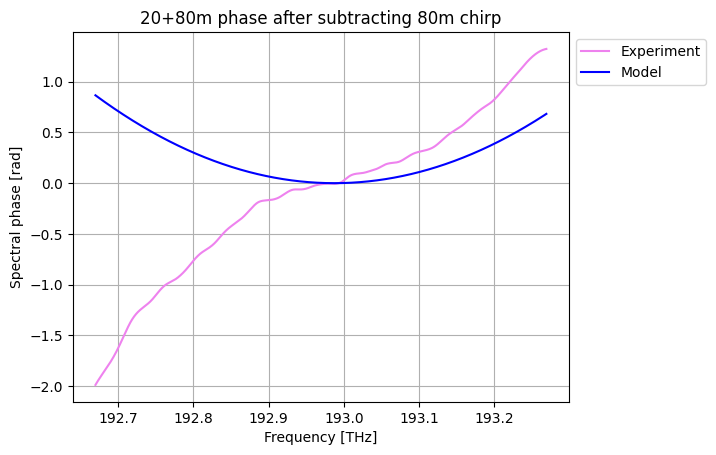

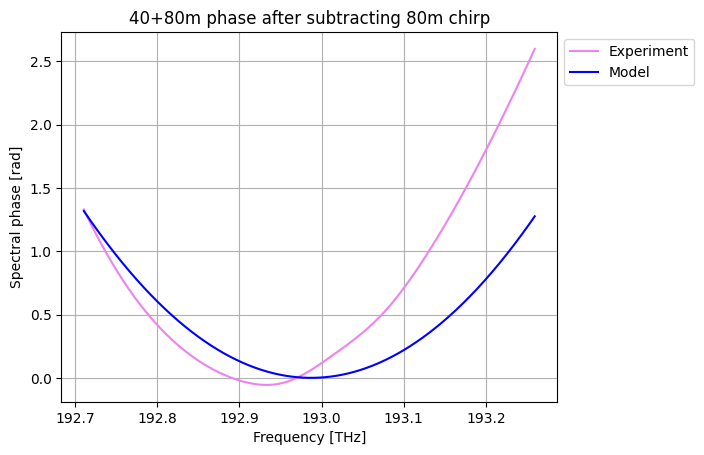

In [160]:
for i in range(len(pulse20)):
    if pulse20.Y[i] == np.min(pulse20.Y):
        min20 = pulse20.X[i]

X = pulse20.X.copy()
Y = pulse20.Y.copy() - phase(X, min20, 83)

pulse_red = sa.spectrum(X, Y, "freq", "phase")
pulse_sim = sa.spectrum(X, phase(X, min20, 20), "freq", "phase")

sa.compare_plots([pulse_red, pulse_sim], title = "20+80m phase after subtracting 80m chirp", legend = ["Experiment", "Model"])

for i in range(len(pulse40)):
    if pulse40.Y[i] == np.min(pulse40.Y):
        min40 = pulse40.X[i]

X = pulse40.X.copy()
Y = pulse40.Y.copy() - phase(X, min20, 83)

pulse_red = sa.spectrum(X, Y, "freq", "phase")
pulse_sim = sa.spectrum(X, phase(X, min20, 40), "freq", "phase")

sa.compare_plots([pulse_red, pulse_sim], title = "40+80m phase after subtracting 80m chirp", legend = ["Experiment", "Model"])
